In [ ]:
# aquí empieza
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Especifica las rutas a tus carpetas de entrenamiento y prueba
train_data_dir = 'waves/training'
test_data_dir = 'waves/testing'

# Especifica el tamaño de tus imágenes y el tamaño del lote (batch size)
img_width, img_height = 100, 100
batch_size = 128

# Configura el generador de imágenes para entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Configura el generador de imágenes para prueba (sin aumentación)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Carga las imágenes de entrenamiento desde la carpeta
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Carga las imágenes de prueba desde la carpeta
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Define el modelo
modeloCNN = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Dropout(0.5),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compila el modelo
modeloCNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrena el modelo
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

modeloCNN.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[early_stop])

# 9.21


Found 8640 images belonging to 2 classes.
Found 240 images belonging to 2 classes.



Epoch 1/100


68/68 [==============================] - 192s 3s/step - loss: 0.6859 - accuracy: 0.5425 - val_loss: 0.6890 - val_accuracy: 0.5500
Epoch 2/100
68/68 [==============================] - 174s 3s/step - loss: 0.6389 - accuracy: 0.6317 - val_loss: 0.6967 - val_accuracy: 0.5792
Epoch 3/100
68/68 [==============================] - 175s 3s/step - loss: 0.5919 - accuracy: 0.6852 - val_loss: 0.6915 - val_accuracy: 0.6417
Epoch 4/100
51/68 [=====================>........] - ETA: 43s - loss: 0.5561 - accuracy: 0.7129

In [8]:
# Evalúa el modelo con el conjunto de datos de prueba
pérdida, precisión = modeloCNN.evaluate(test_generator)

# Imprime las métricas
print("Pérdida en el conjunto de prueba:", pérdida)
print("Precisión en el conjunto de prueba:", precisión)

1/1 [==============================] - 0s 179ms/step - loss: 0.3573 - accuracy: 0.9333
Pérdida en el conjunto de prueba: 0.3573010563850403
Precisión en el conjunto de prueba: 0.9333333373069763


In [3]:
modeloCNN.save('waves.pkl')

INFO:tensorflow:Assets written to: waves.pkl\assets


INFO:tensorflow:Assets written to: waves.pkl\assets


In [9]:
import pickle

# Supongamos que tienes un modelo llamado 'modelo'
with open('modelo.pkl', 'wb') as file:
    pickle.dump(modeloCNN, file)


In [10]:
from tensorflow.keras.models import save_model

# Supongamos que tienes un modelo llamado 'modelo'
modeloCNN.save('modeloCNN.h5')


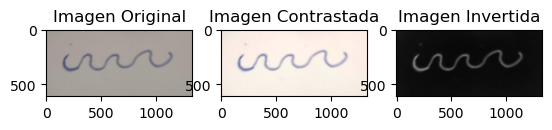

In [7]:
import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen original
ruta_original = "wave.jpeg"  # Añadir imagen nueva

# Leer la imagen original
imagen_original = cv2.imread(ruta_original)

# Verificar que la imagen se haya cargado correctamente
if imagen_original is not None:
    # Aplicar aumento de contraste
    alpha = 1.5  # Factor de aumento de contraste
    beta = 0     # Desplazamiento
    imagen_contrastada = cv2.convertScaleAbs(imagen_original, alpha=alpha, beta=beta)

    # Convertir la imagen contrastada a escala de grises
    imagen_gris = cv2.cvtColor(imagen_contrastada, cv2.COLOR_BGR2GRAY)

    # Invertir colores en escala de grises
    imagen_invertida = cv2.bitwise_not(imagen_gris)

    # Nombre de la nueva imagen invertida
    nombre_nueva_imagen = "parkinson_negro_prueba.png"

    # Guardar la imagen invertida
    cv2.imwrite(nombre_nueva_imagen, imagen_invertida)

    # Mostrar la imagen original, contrastada e invertida
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Original")

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(imagen_contrastada, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Contrastada")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(imagen_invertida, cv2.COLOR_BGR2RGB), cmap='gray')
    plt.title("Imagen Invertida")

    plt.show()
else:
    print(f"Error: No se pudo cargar la imagen en: {ruta_original}")


In [10]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input

# Cargar el modelo previamente entrenado
modelo_cargado = load_model('modeloCNN_wave_93.h5')

# Ruta de la imagen que deseas predecir
img_path = nombre_nueva_imagen  # Asegúrate de proporcionar la ruta correcta

# Cargar la imagen y ajustar su tamaño
img = image.load_img(img_path, target_size=(100, 100)) # mirar sa plantilla i ses fotos com estan exactament

# Convertir la imagen a un array de numpy
img_array = image.img_to_array(img)

# Expandir las dimensiones para que coincidan con las expectativas del modelo
img_array = np.expand_dims(img_array, axis=0)

# Preprocesar la imagen
img_array = preprocess_input(img_array)

# Realizar la predicción
prediccion = modelo_cargado.predict(img_array)

print(prediccion)
# Obtener la clase predicha
clase_predicha = "parkinson" if prediccion[0][0] > 0.5 else "healthy"

print("Predicción: " + clase_predicha)


1/1 [==============================] - 0s 158ms/step
[[0.9655373]]
Predicción: parkinson


In [14]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input

# Cargar el modelo previamente entrenado
modelo_cargado = load_model('modeloCNN_wave_93.h5')

# Ruta de la imagen que deseas predecir
img_path = nombre_nueva_imagen  # Asegúrate de proporcionar la ruta correcta

# Cargar la imagen y ajustar su tamaño
img = image.load_img(img_path, target_size=(100, 100))

# Convertir la imagen a un array de numpy
img_array = image.img_to_array(img)

# Expandir las dimensiones para que coincidan con las expectativas del modelo
img_array = np.expand_dims(img_array, axis=0)

# Preprocesar la imagen
img_array = preprocess_input(img_array)

# Realizar la predicción
prediccion = modelo_cargado.predict(img_array)

print(prediccion)
# Obtener la clase predicha
clase_predicha = "parkinson" if prediccion[0][0] > 0.5 else "healthy"

print("Predicción: " + clase_predicha)


1/1 [==============================] - 0s 208ms/step
[[0.1227693]]
Predicción: healthy
